# Mnist 손글씨 Using CNN, DNN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential # 순차적인 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기   트레인:6만  , 테스트: 1만개
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# shape자리에 -1을 넣어도 상관이 없다. why? -> 그 뒤에 1보고 알아서 자리 맞추라고 지정해서.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

# CNN

In [5]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [9]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20,
                    batch_size=200, #epochs=5, verbose=2, 
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
59800/60000 [============================>.] - ETA: 0s - loss: 0.2679 - accuracy: 0.9183
Epoch 00001: val_loss improved from inf to 0.05255, saving model to ./model/mnist-cnn-01-0.0525.hdf5
60000/60000 [==============================] - 43s 715us/sample - loss: 0.2675 - accuracy: 0.9184 - val_loss: 0.0525 - val_accuracy: 0.9829
Epoch 2/20
59800/60000 [============================>.] - ETA: 0s - loss: 0.0886 - accuracy: 0.9735
Epoch 00002: val_loss improved from 0.05255 to 0.03841, saving model to ./model/mnist-cnn-02-0.0384.hdf5
60000/60000 [==============================] - 42s 701us/sample - loss: 0.0886 - accuracy: 0.9736 - val_loss: 0.0384 - val_accuracy: 0.9871
Epoch 3/20
59800/60000 [============================>.] - ETA: 0s - loss: 0.0642 - accuracy: 0.9809
Epoch 00003: val_loss improved from 0.03841 to 0.03366, saving model to ./model/mnist-cnn-03-0.0337.hdf5
60000/60000 [==============================] - 42s 703us/sa

In [10]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy: 0.9917


In [11]:
 # 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

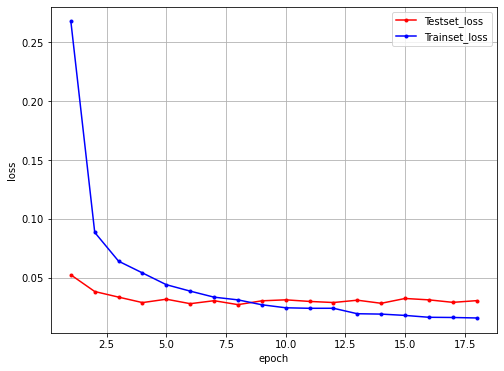

In [12]:
 # 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# DNN

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [14]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

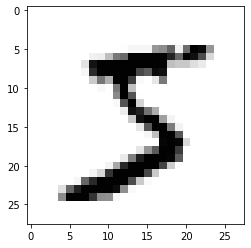

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [17]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d ' % i)
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [18]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [19]:
X_train.shape

(60000, 784)

In [20]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [21]:
Y_class_train[0]

5

In [22]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [23]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

In [25]:
# seed 값 설정
seed = 0
np.random.seed(seed)

In [26]:
# 모델 프레임 설정
model = Sequential([
    Dense(1000, input_dim=784, activation='relu'),
    Dense(500, activation='relu'),
    Dense(250, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 1,413,260
Trainable params: 1,413,260
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [29]:

modelpath = MODEL_DIR + "mnist{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [30]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=784, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.13095, saving model to ./model/mnist01-0.1309.hdf5

Epoch 00002: val_loss improved from 0.13095 to 0.08400, saving model to ./model/mnist02-0.0840.hdf5

Epoch 00003: val_loss improved from 0.08400 to 0.07755, saving model to ./model/mnist03-0.0776.hdf5

Epoch 00004: val_loss improved from 0.07755 to 0.06279, saving model to ./model/mnist04-0.0628.hdf5

Epoch 00005: val_loss did not improve from 0.06279

Epoch 00006: val_loss did not improve from 0.06279

Epoch 00007: val_loss did not improve from 0.06279

Epoch 00008: val_loss did not improve from 0.06279

Epoch 00009: val_loss did not improve from 0.06279

Epoch 00010: val_loss did not improve from 0.06279

Epoch 00011: val_loss did not improve from 0.06279

Epoch 00012: val_loss did not improve from 0.06279

Epoch 00013: val_loss did not improve from 0.06279

Epoch 00014: val_loss did not improve from 0.06279


In [31]:
from tensorflow.keras.models import load_model
# del model
model = load_model('model/mnist08-0.0781.hdf5')

In [32]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=2)[1]))

10000/10000 - 0s - loss: 0.0781 - accuracy: 0.9763

 Test Accuracy: 0.9763


In [33]:

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

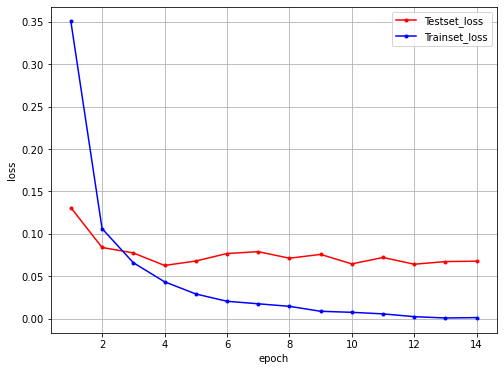

In [34]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# DNN

In [35]:
from tensorflow import keras

In [36]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [37]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [38]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# shape자리에 -1을 넣어도 상관이 없다. why? -> 그 뒤에 1보고 알아서 자리 맞추라고 지정해서.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# 모델 훈련

In [42]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [43]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [44]:
model.fit(X_train, Y_class_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/sample - loss: 2.7317 - accuracy: 0.8543
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4109 - accuracy: 0.9018
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3052 - accuracy: 0.9256
Epoch 4/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2605 - accuracy: 0.9348
Epoch 5/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2335 - accuracy: 0.9413
Epoch 6/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2229 - accuracy: 0.9454
Epoch 7/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2133 - accuracy: 0.9481
Epoch 8/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1992 - accuracy: 0.9518
Epoch 9/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1996 - accuracy: 0.9533
Epoch 10/10
60

In [45]:
# 성능평가 

test_loss, test_acc = model.evaluate(X_train,  Y_class_train, verbose=2)

print('\n테스트 정확도:', test_acc)

60000/60000 - 1s - loss: 0.1606 - accuracy: 0.9614

테스트 정확도: 0.9614


In [46]:
predictions = model.predict(X_train)

In [47]:
predictions[0]

array([4.2744318e-24, 2.4824691e-12, 1.0773793e-30, 3.8804702e-09,
       0.0000000e+00, 1.0000000e+00, 2.0349451e-29, 0.0000000e+00,
       8.1452611e-20, 1.2066969e-12], dtype=float32)

In [48]:
np.argmax(predictions[0])

5

In [49]:
# 실제 값
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

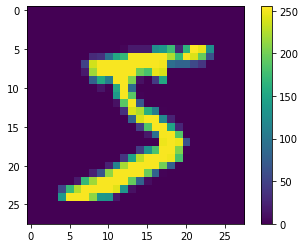

In [52]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [53]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])